# Attacking the networks 
- using (random, degree, betweenness, closeness, and clustering based edges weight)

In [39]:
import pandas as pd 
import networkx as nx
import os
import random
from random import sample

def read_graph2(g, v):
    file_name = f'standard networks dataset{datasets[int(g)]}'
    G = nx.Graph()
    if v=='Karate':
        G = nx.karate_club_graph()
    elif v=='Erdos Renyi':
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        G = nx.gnm_random_graph(500, 1500)
    elif v=='Barabasi_albert_graph':
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        # p = int(input("enter P value?"))
        G = nx.barabasi_albert_graph(500, 3)
    else:
        ext = os.path.splitext(file_name)[1]
        if ext=='.edges':
            G = nx.read_adjlist(file_name, create_using = nx.Graph(), nodetype = int)
        elif ext=='.gml':
            G = nx.read_gml(file_name)
        elif ext=='.mtx':
            G = None
            #matrix = scipy.io.mmread(file_name)
            #G = nx.from_scipy_sparse_matrix(matrix)
        elif ext=='.txt':
            file = open(file_name, 'r')
            lines=  file.readlines()
            G = nx.Graph()
            for line in lines:
                if " " in line:
                    N = line.split(" ")
                else:
                    N = line.split("\t")
                G.add_edge(N[0], N[1])
    return G


names = [ 'dolphins',
          'polbooks',
          'word_adjacencies',
          'arenas-email',
             'Karate',
             'Erdos Renyi',
#              'USAir97',
             'circuits s208',
             'circuits s420',
             'circuits s838',
             'E. Coli',
             'Barabasi_albert_graph',
             'facebook 0',
#              'facebook 107',
             'facebook 348',
             'facebook 414',
             'facebook 686',
             'facebook 1684',
#              'bio-celegans',
             'bn-macaque-rhesus_brain_2',
             'soc-tribes',
             'fb-pages-food',
             'bn-cat-mixed-species_brain_1',
#              'ca-sandi_auths',
             'soc-firm-hi-tech']

datasets = [ '/dolphins/dolphins.gml',
             '/polbooks/out2.txt',
             '/word_adjacencies.gml/word_adjacencies.gml',
             '/arenas-email/out2.txt',
             'Karate',
             'Erdos Renyi',
#              '/USAir97/USAir97.mtx',
             '/circuits/s208_st.txt',
             '/circuits/s420_st.txt',
             '/circuits/s838_st.txt',
             '/E. Coli/E. Coli.txt',
             'Barabasi_albert_graph',
             '/facebook/0.edges',
#              '/facebook/107.edges',
             '/facebook/348.edges',
             '/facebook/414.edges',
             '/facebook/686.edges',
             '/facebook/1684.edges',
#              '/bio-celegans/bio-celegans.mtx',
             '/bn-macaque-rhesus_brain_2/bn-macaque-rhesus_brain_2.txt',
             '/soc-tribes/soc-tribes.txt',
             '/fb-pages-food/fb-pages-food.txt',
             '/bn-cat-mixed-species_brain_1/bn-cat-mixed-species_brain_1.txt',
#              '/ca-sandi_auths/ca-sandi_auths.mtx',
             '/soc-firm-hi-tech/soc-firm-hi-tech.txt']

# read the networks
networks = []
for i,v in enumerate(names):
    network = {}
    network['name'] = v
    network['path'] = datasets[i]
    network['graph'] = read_graph2(i, v)
    networks.append(network)
networks



[{'name': 'dolphins',
  'path': '/dolphins/dolphins.gml',
  'graph': <networkx.classes.graph.Graph at 0x7feebfe1c760>},
 {'name': 'polbooks',
  'path': '/polbooks/out2.txt',
  'graph': <networkx.classes.graph.Graph at 0x7feebc711a30>},
 {'name': 'word_adjacencies',
  'path': '/word_adjacencies.gml/word_adjacencies.gml',
  'graph': <networkx.classes.graph.Graph at 0x7feebc711730>},
 {'name': 'arenas-email',
  'path': '/arenas-email/out2.txt',
  'graph': <networkx.classes.graph.Graph at 0x7feebc711160>},
 {'name': 'Karate',
  'path': 'Karate',
  'graph': <networkx.classes.graph.Graph at 0x7feec4261be0>},
 {'name': 'Erdos Renyi',
  'path': 'Erdos Renyi',
  'graph': <networkx.classes.graph.Graph at 0x7feec4335490>},
 {'name': 'circuits s208',
  'path': '/circuits/s208_st.txt',
  'graph': <networkx.classes.graph.Graph at 0x7feebcbc9b20>},
 {'name': 'circuits s420',
  'path': '/circuits/s420_st.txt',
  'graph': <networkx.classes.graph.Graph at 0x7feebfe1c370>},
 {'name': 'circuits s838',
  '

## Attacking the network
Attack models are:
-  RND
-  DNA
-  BNA
-  CNA
-  CcNA

In [57]:
attacking_models = ['RND','DNA','BNA','CNA','CcNA']
centralities = [nx.degree_centrality, nx.betweenness_centrality, nx.closeness_centrality, nx.clustering]
centr        = ['Degree'            ,   'Betweenness'          ,   'Closeness'          ,   'Clustering']

def nodes_centrality(G, C):
    '''return a weighted edges'''
    W = []
    for u in G.nodes():
        W.append([u, C[u]])
    return sorted(W, key=lambda x: x[1], reverse=True)


def attack(centr):
    '''Idea: start removing edges from the network and measure the diameter'''
    results = {}
    for network in networks:
        G = nx.Graph()
        G = network['graph'].copy()
        C = centr(G)                          # finding the centrality of the nodes
        W = nodes_centrality(G, C)              # node's centrality
        E = round(len(W) * 0.2)                  # number of edges to be removed 
        # print(f'W = {len(W)}\nE = {E}')
        nodes_to_remove = []
        for u, _ in W[:E]:
            if u not in nodes_to_remove:
                nodes_to_remove.append(u)
            if v not in nodes_to_remove:
                nodes_to_remove.append(v)

        print(len(G.nodes()))
        G.remove_nodes_from(nodes_to_remove)
        print(len(G.nodes()), '\n')
        results[network['name']] = G
    return results

results = {v: attack(centralities[i]) for i, v in enumerate(centr)}
print('simulation is completed')


62
50 

190
152 

112
90 

1893
1514 

34
27 

500
400 

122
98 

252
202 

512
410 

1699
1359 

500
400 

333
266 

224
179 

150
120 

168
134 

786
629 

102
82 

16
13 

458
366 

130
104 

33
26 

62
50 

190
152 

112
90 

1893
1514 

34
27 

500
400 

122
98 

252
202 

512
410 

1699
1359 

500
400 

333
266 

224
179 

150
120 

168
134 

786
629 

102
82 

16
13 

458
366 

130
104 

33
26 

62
50 

190
152 

112
90 

1893
1514 

34
27 

500
400 

122
98 

252
202 

512
410 

1699
1359 

500
400 

333
266 

224
179 

150
120 

168
134 

786
629 

102
82 

16
13 

458
366 

130
104 

33
26 

62
50 

190
152 

112
90 

1893
1514 

34
27 

500
400 

122
98 

252
202 

512
410 

1699
1359 

500
400 

333
266 

224
179 

150
120 

168
134 

786
629 

102
82 

16
13 

458
366 

130
104 

33
26 

simulation is completed


In [58]:
def RND_attack():
    results = {}
    for network in networks:
        G = nx.Graph()
        G = network['graph'].copy()
        W = list(G.nodes())
        E = round(len(W) * 0.2)                  # number of edges to be removed 
        nodes_to_remove =  random.sample(W, E)

        print(len(G.nodes()))
        G.remove_nodes_from(nodes_to_remove)
        print(len(G.nodes()), '\n')
        results[network['name']] = G
    return results

results['Random'] = RND_attack()

62
50 

190
152 

112
90 

1893
1514 

34
27 

500
400 

122
98 

252
202 

512
410 

1699
1359 

500
400 

333
266 

224
179 

150
120 

168
134 

786
629 

102
82 

16
13 

458
366 

130
104 

33
26 



In [50]:
networks

[{'name': 'dolphins',
  'path': '/dolphins/dolphins.gml',
  'graph': <networkx.classes.graph.Graph at 0x7feebfe1c760>},
 {'name': 'polbooks',
  'path': '/polbooks/out2.txt',
  'graph': <networkx.classes.graph.Graph at 0x7feebc711a30>},
 {'name': 'word_adjacencies',
  'path': '/word_adjacencies.gml/word_adjacencies.gml',
  'graph': <networkx.classes.graph.Graph at 0x7feebc711730>},
 {'name': 'arenas-email',
  'path': '/arenas-email/out2.txt',
  'graph': <networkx.classes.graph.Graph at 0x7feebc711160>},
 {'name': 'Karate',
  'path': 'Karate',
  'graph': <networkx.classes.graph.Graph at 0x7feec4261be0>},
 {'name': 'Erdos Renyi',
  'path': 'Erdos Renyi',
  'graph': <networkx.classes.graph.Graph at 0x7feec4335490>},
 {'name': 'circuits s208',
  'path': '/circuits/s208_st.txt',
  'graph': <networkx.classes.graph.Graph at 0x7feebcbc9b20>},
 {'name': 'circuits s420',
  'path': '/circuits/s420_st.txt',
  'graph': <networkx.classes.graph.Graph at 0x7feebfe1c370>},
 {'name': 'circuits s838',
  '

In [60]:
def LCC(G):
    connected_components = list(nx.connected_components(G))
    if len(connected_components) > 0:
        subG = G.subgraph(max(connected_components, key=len))
        if len(subG.nodes())>1: 
            return subG
        else:
            return None
    else:
        # Handle the case when there are no connected components
        return None


def node_robustness(G):
    N = len(G.nodes())
    if N==0:
        return 0
    else:
        t = []
        G2 = nx.Graph()
        G2 = G.copy()
        for q in range(N):
            d = q * len(G2.nodes())
            D = random.sample(G2.nodes(), d)
            G2.remove_nodes_from(D)
            lcc = LCC(G2)
            if lcc:
                t.append(len(LCC(G2).nodes()))
        print(t)
        return sum(t)/N


def edge_robustness(G):
    E = len(G.edges())
    if E == 0:
        return 0
    else:
        t = []
        G2 = nx.Graph()
        G2 = G.copy()
        for q in range(E):
            d = q * len(G2.edges())
            D = random.sample(G2.edges(), d)
            G2.remove_edges_from(D)
            lcc = LCC(G2)
            if lcc:
                t.append(len(LCC(G2).edges()))
        print(t)
        return sum(t)/E

def get_G(name):
    '''Get one graph given its name'''
    for n in networks:
        if n['name'] == name:
            desired = n['graph']
            break
    return desired

Rn = {}
# Re = {}

for c in results:
    print(c)
    Networks = results[c]
    RNs = []
    # REs = []
    for net in Networks:
        print('\t', net)
        org = get_G(net)
        Rn_v = node_robustness(results[c][net])/node_robustness(org)
        # Re_v = edge_robustness(results[c][net])/edge_robustness(org)
        print(f'\t\tRn = {Rn_v}  Re = {Re_v}')
        RNs.append(Rn_v)
        # REs.append(Re_v)
    Rn[c] = RNs
    # Re[c] = REs
print(Rn, '\n')
# print(Re, '\n')

Degree
	 dolphins
[42]
[62]
[59]
[159]
		Rn = 0.84  Re = 1.0
	 polbooks
[38]
[185]
[47]
[437]
		Rn = 0.25675675675675674  Re = 0.4474547731099694
	 word_adjacencies
[79]
[112]
[114]
[425]
		Rn = 0.8777777777777778  Re = 1.0
	 arenas-email
[892]
[1841]


/tmp/ipykernel_34465/1578962123.py:24: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  D = random.sample(G2.nodes(), d)
/tmp/ipykernel_34465/1578962123.py:43: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  D = random.sample(G2.edges(), d)


[1127]
[5424]
		Rn = 0.6058091167212121  Re = 0.8988968780727631
	 Karate
[6]
[34]
[6]
[78]
		Rn = 0.2222222222222222  Re = 0.46153846153846156
	 Erdos Renyi
[390]
[500]
[702]
[1500]
		Rn = 0.975  Re = 0.9985775248933144
	 circuits s208
[54]
[122]
[55]
[189]
		Rn = 0.5510204081632653  Re = 0.625
	 circuits s420
[110]
[252]
[113]
[399]
		Rn = 0.5445544554455446  Re = 0.6141304347826086
	 circuits s838
[230]
[512]
[241]
[819]
		Rn = 0.5609756097560976  Re = 0.6342105263157894
	 E. Coli
[5]
[1590]
[4]
[3669]
		Rn = 0.0039313960968340575  Re = 0.0341419096938312
	 Barabasi_albert_graph
[306]
[500]
[337]
[1491]
		Rn = 0.765  Re = 0.9132791327913279
	 facebook 0
[230]
[324]
[682]
[2514]
		Rn = 0.8886800334168755  Re = 0.9361046632011422
	 facebook 348
[179]
[224]
[1047]
[3192]
		Rn = 1.0  Re = 1.0
	 facebook 414
[118]
[148]
[756]
[1692]
		Rn = 0.9966216216216215  Re = 0.9992692318502487
	 facebook 686
[133]
[168]
[498]
[1656]
		Rn = 0.9925373134328358  Re = 1.0
	 facebook 1684
[617]
[775]
[4

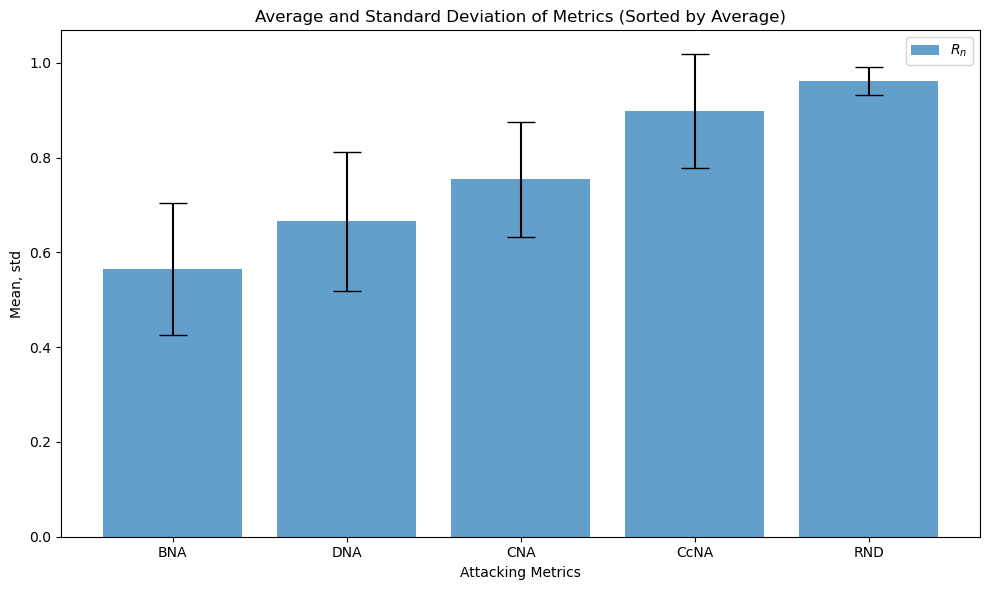

In [89]:

import statistics
import matplotlib.pyplot as plt

def av_std(L):
    return statistics.mean(L), statistics.stdev(L)

avg = []
std = []
for i in Rn:
    av, sd = av_std(Rn[i])
    avg.append(av)
    std.append(sd)


metrics = ['DNA', 'BNA', 'CNA', 'CcNA', 'RND']
average_values = avg
std_deviation_values = std

# Combine metric names, average values, and standard deviation values into tuples
data = list(zip(metrics, average_values, std_deviation_values))

# Sort the data based on average values
sorted_data = sorted(data, key=lambda x: x[1])

# Extract sorted metric names and values
sorted_metrics, sorted_averages, sorted_std_deviations = zip(*sorted_data)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting sorted average values
plt.bar(sorted_metrics, sorted_averages, yerr=sorted_std_deviations, alpha=0.7, capsize=10, label='$R_n$')

plt.xlabel('Attacking Metrics')
plt.ylabel('Mean, std')
plt.title('Average and Standard Deviation of Metrics (Sorted by Average)')

plt.legend()
plt.tight_layout()  # Adjust the spacing
plt.savefig('Results/Final/attacks.png', dpi = 450)

plt.show()


In [79]:
for node_attack in results:
    print(node_attack)
    

Degree
Betweenness
Closeness
Clustering
Random


Results/Final/Rn/Rn DNARn of grown DNA networks.png


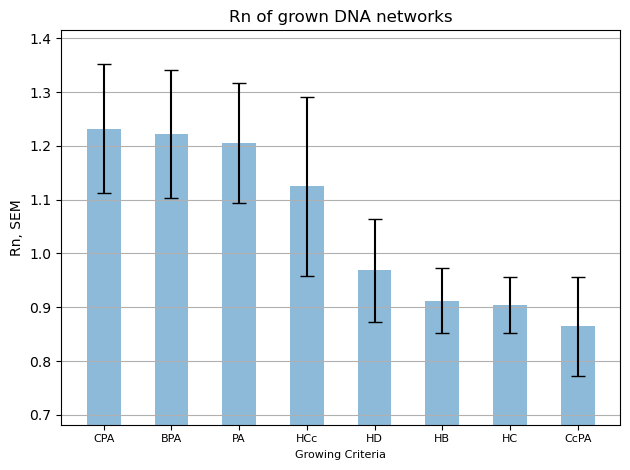

Results/Final/Re/Re DNARe of grown DNA networks.png


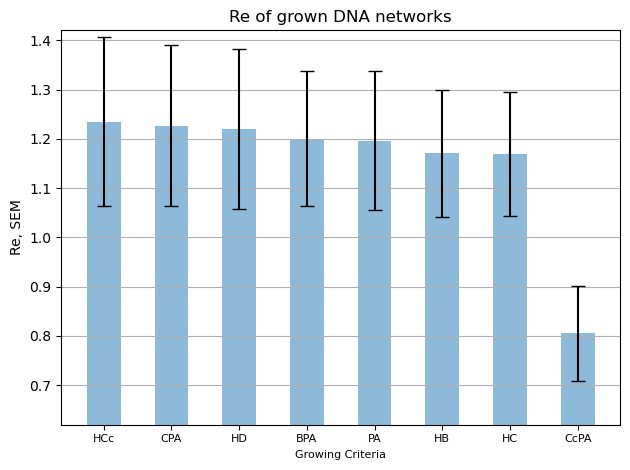

Results/Final/Rn/Rn BNARn of grown BNA networks.png


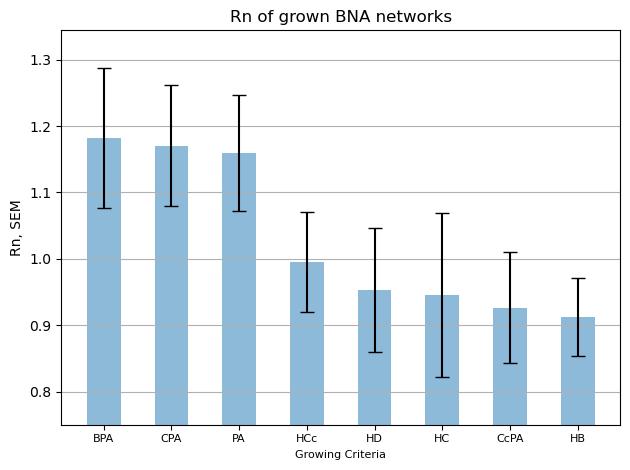

Results/Final/Re/Re BNARe of grown BNA networks.png


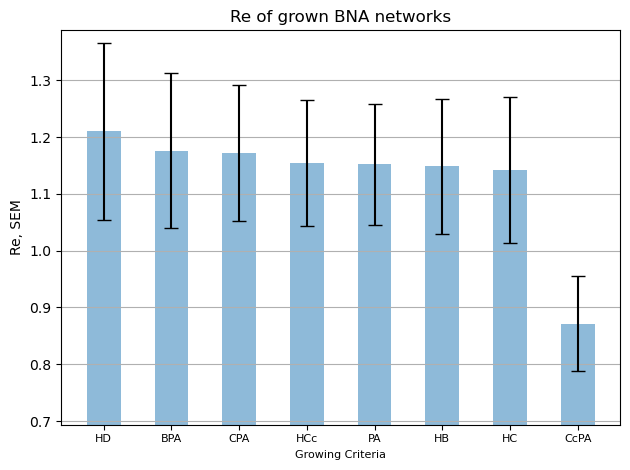

Results/Final/Rn/Rn CNARn of grown CNA networks.png


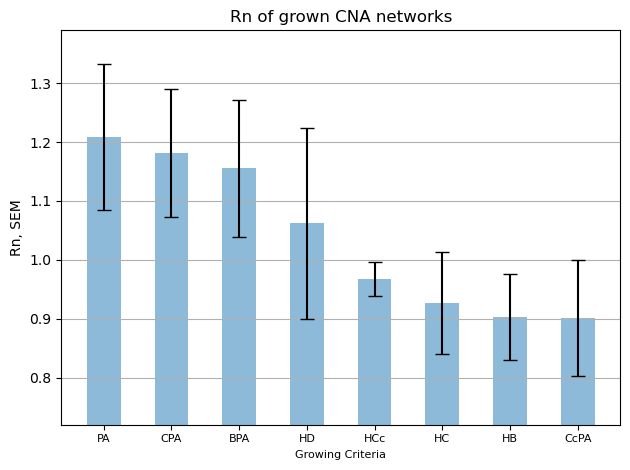

Results/Final/Re/Re CNARe of grown CNA networks.png


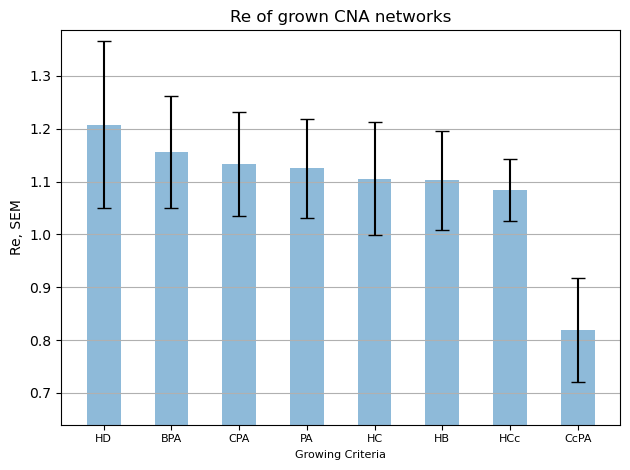

Results/Final/Rn/Rn CcNARn of grown CcNA networks.png


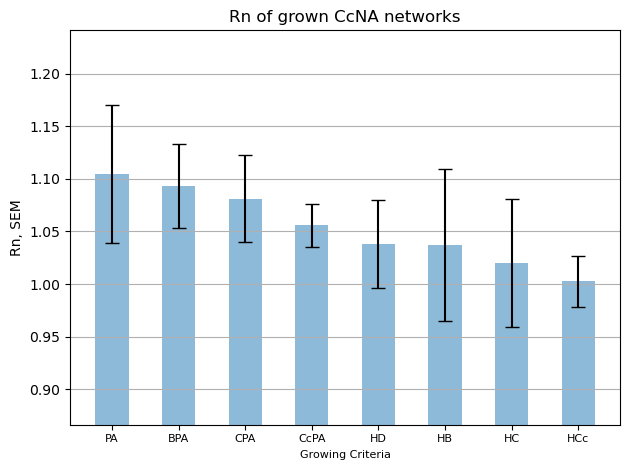

Results/Final/Re/Re CcNARe of grown CcNA networks.png


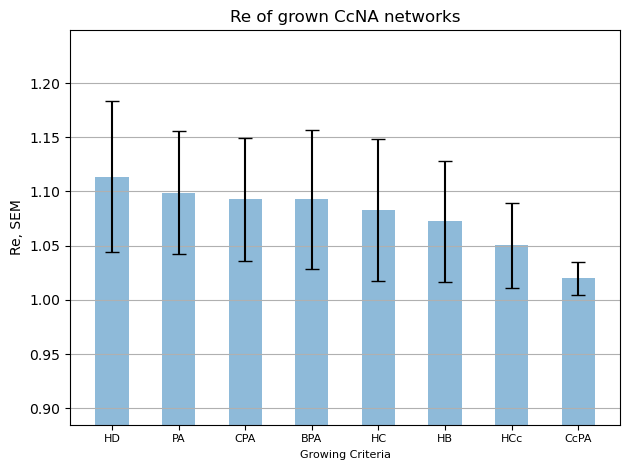

In [90]:
NodesAttacks = ['DNA', 'BNA', 'CNA', 'CcNA']
attacks = {centr[i]: NodesAttacks[i] for i in range(4)}

import numpy as np

def plot_df(df, title, method, path='', xlabel='', ylabel = '', asc = True):
    # _ = input(df.columns)
    # df.columns = ['Degree', 'Betweenness', 'Closeness','Clustering']
    df.columns = ['PA', 'BPA', 'CPA', 'CcPA','HD', 'HB', 'HC', 'HCc']
    # df.rename(columns = {}, inplace = True)
    # df.columns = ['DNA','BNA','CNA','CcNA','RND']
    df.mean().sort_values()
    df = df.reindex(df.mean().sort_values(ascending = asc,).index, axis=1)
    df.mean().sort_values()
    diff =  [i for i in df]
    aver  = [df[i].mean() for i in df]
    stdev = [df[i].sem() for i in df]
    #---------------------------------
    """Colored plotting"""
    # Create lists for the plot
    x_pos = np.arange(len(diff))
    fig, ax = plt.subplots()
    ax.bar(x_pos, aver, yerr=stdev, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.5, label='$R_n$')

    max_y_lim = max(aver) + max(stdev)/2 +0.1
    min_y_lim = min(aver) - max(stdev)/2 -0.1
    plt.ylim(min_y_lim, max_y_lim)
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(diff, fontsize=8)
    ax.set_title(title)
    ax.yaxis.grid(True)
    
    xlocs, xlabs = plt.xticks()
    # plt.xticks(rotation=90)

    # Save the figure and show
    plt.tight_layout()
    print(path+title+'.png')
    plt.savefig(path+'.png', dpi = 450)
    plt.show()

def Merge(dict1, dict2):
    for i in dict2.keys():
        dict1[i]=dict2[i]
    return dict1 
    
def task7_3():
    '''plotting all results in one plot...'''
    cPath = f'Results/Final'
    HC = pd.read_csv(f'Results/Final/HC Results.csv')
    PA = pd.read_csv(f'Results/Final/PA Results.csv')
    
    A = HC
    for cen in centr:
        A = HC
        newA = A[A['Attacking Model']== cen]
        HC_Rn = {m: newA[m]/newA['Rn'] for m in ['Rn_HD', 'Rn_HB', 'Rn_HC','Rn_HCc']}
        HC_Re = {m: newA[m]/newA['Re'] for m in ['Re_HD', 'Re_HB', 'Re_HC','Re_HCc']}
        A = PA
        newA = A[A['Attacking Model']==cen]
        PA_Rn = {m: newA[m]/newA['Rn'] for m in ['Rn_PA', 'Rn_BPA', 'Rn_CPA','Rn_CcPA']}
        PA_Re = {m: newA[m]/newA['Re'] for m in ['Re_PA', 'Re_BPA', 'Re_CPA','Re_CcPA']}
    
        Rn = Merge(PA_Rn, HC_Rn)  
        
        Re = Merge(PA_Re, HC_Re)
        
        plot_df(pd.DataFrame(Rn), f'Rn of grown {attacks[cen]} networks', 'Rn', f'{cPath}/Rn/Rn {attacks[cen]}', 'Growing Criteria', 'Rn, SEM', False)
        plot_df(pd.DataFrame(Re), f'Re of grown {attacks[cen]} networks', 'Re', f'{cPath}/Re/Re {attacks[cen]}', 'Growing Criteria', 'Re, SEM', False)

task7_3()

